In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import polyline
import numpy as np
from geopy import distance
from tqdm import tqdm_notebook

In [146]:
def get_distance(latitude, longitude, del_latitude, del_longitude):
    """
    Get distance from start and destination coordinates.
    :param latitude: latitude coord
    :param longitude: longitude coord
    :param del_latitude: destination latitude coord
    :param del_longitude: destination longitude coord
    :return: distance in km
    """
    coord = (latitude, longitude)
    del_coord = (del_latitude, del_longitude)
    return distance.geodesic(coord, del_coord).km

In [147]:
df = pd.read_csv('data/train.csv', parse_dates=['OrderedDate', 'ClientCollected', 'GoodArrived', 'ReadyForCollection'])
df.dropna(subset=['arrived_latitude', 'arrived_longitude', 'del_latitude', 'del_longitude'], inplace=True)
df = df.reset_index()

In [143]:
city_names = {1078: 'Казань (GMT+3)',
              22390: 'Самара (GMT+4)',
              22430: 'Саратов (GMT+4)',
              22438: 'Пермь (GMT+5)',
              338: 'Краснодар (GMT +3)',
              22402: 'Уфа (GMT +5)', 
              22406: 'Екатеринбург (GMT +5)', 
              22394: 'Тольятти (GMT +4)'}

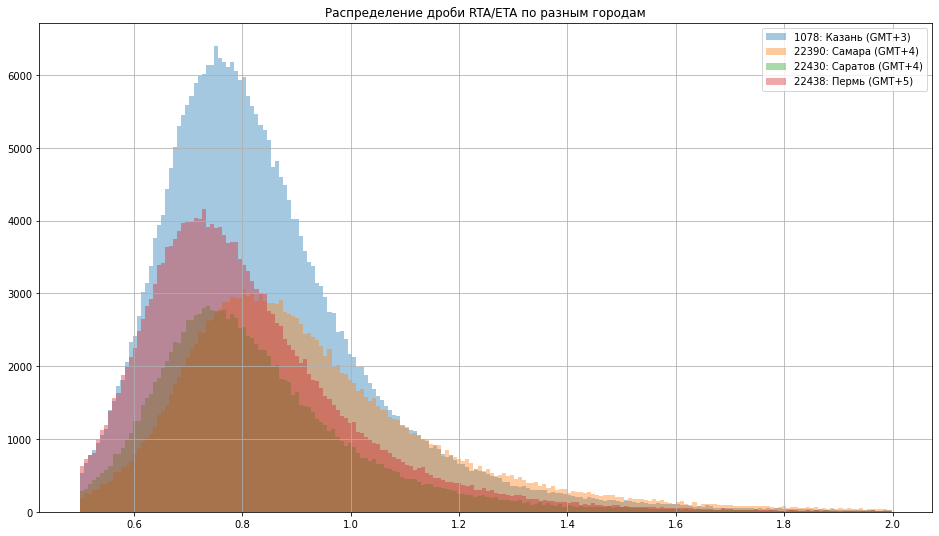

In [144]:
for city_id, df_city in df.groupby('main_id_locality'):
    ratio = df_city.RTA / df_city.ETA
    ratio.hist(bins=200, label=f'{city_id}: {city_names[city_id]}', alpha=0.4, figsize=(16,9))
    plt.title('Распределение дроби RTA/ETA по разным городам')
    plt.legend()
    plt.savefig('results/rta_eta_ratio.png', bbox_inches='tight')

In [149]:
%%time

df['arrived_error'] = df.apply(lambda r: get_distance(r['del_latitude'], r['del_longitude'], 
                                                      r['arrived_latitude'], r['arrived_longitude']), axis=1)

CPU times: user 2min 31s, sys: 552 ms, total: 2min 32s
Wall time: 2min 32s


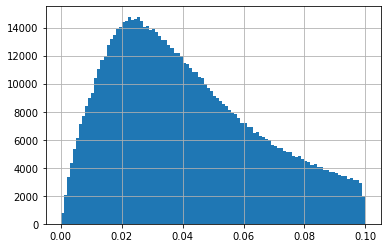

In [157]:
df[df.arrived_error < df.arrived_error.quantile(0.993)].arrived_error.hist(bins=100)

In [158]:
df['rel_arrived_error'] = df['arrived_error'] / df['EDA']

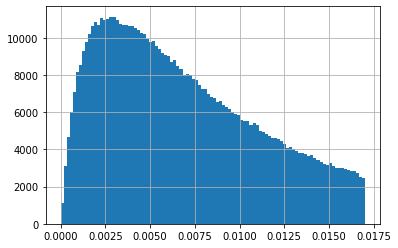

In [168]:
df[df.rel_arrived_error < df.rel_arrived_error.quantile(0.8)].rel_arrived_error.hist(bins=100)

In [163]:
df.to_csv('train_with_arrived_error.csv', index=False)

In [169]:
df[df.rel_arrived_error < df.rel_arrived_error.quantile(0.80)].to_csv('train_with_arrived_error_q80.csv', index=False)

In [170]:
df[df.rel_arrived_error < df.rel_arrived_error.quantile(0.90)].to_csv('train_with_arrived_error_q90.csv', index=False)